## Loading Libraries

In [1]:
import pandas as pd
import seaborn as sns
from elo import rate_1vs1
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Loading Match Data

In [2]:
matches=pd.read_csv('MatchData.csv',low_memory=False)  ## IDk what low memory does but it works



### Getting List of all teams

In [4]:

## List of all teams
teamset=set()
for team in matches['HomeTeam']:
    teamset.add(team)
for team in matches['AwayTeam']:
    teamset.add(team)
print(teamset)

{nan, 'Numancia', 'Ath Bilbao', 'Sp Gijon', 'Tenerife', 'Salamanca', 'Getafe', 'Valladolid', 'Sevilla', 'Zaragoza', 'Las Palmas', 'Murcia', 'Ath Madrid', 'Hercules', 'Gimnastic', 'Lerida', 'Huesca', 'Leganes', 'Logrones', 'Girona', 'Villarreal', 'Espanol', 'Elche', 'Alaves', 'Osasuna', 'Extremadura', 'Santander', 'Xerez', 'Sociedad', 'Cadiz', 'Vallecano', 'Barcelona', 'La Coruna', 'Oviedo', 'Compostela', 'Eibar', 'Real Madrid', 'Levante', 'Granada', 'Valencia', 'Recreativo', 'Mallorca', 'Albacete', 'Betis', 'Almeria', 'Cordoba', 'Merida', 'Villareal', 'Malaga', 'Celta'}


TeamData of each and every team( We will add fields as we go on)

In [5]:
teamsdata={}
for team in teamset:
    teamdata={}
    teamdata['matches_played']=0
    teamdata['won']=0
    teamdata['tie']=0
    teamdata['elo']=1200  #Default rating
    teamsdata[team]=teamdata

In [6]:
matches

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,HTHG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,SP1,05/09/93,Ath Bilbao,Albacete,4.0,1.0,H,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SP1,05/09/93,Ath Madrid,Logrones,1.0,0.0,H,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,SP1,05/09/93,Barcelona,Sociedad,3.0,0.0,H,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,SP1,05/09/93,La Coruna,Celta,0.0,0.0,D,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,SP1,05/09/93,Osasuna,Real Madrid,1.0,4.0,A,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11046,38,SP1,04/10/2020,Osasuna,Celta,2.0,0.0,H,2020,1.0,...,1.55,0.00,2.09,1.84,2.09,1.85,2.16,1.91,2.05,1.83
11047,39,SP1,04/10/2020,Alaves,Ath Bilbao,1.0,0.0,H,2020,0.0,...,1.40,0.25,1.93,2.00,1.95,1.97,1.97,2.01,1.92,1.94
11048,40,SP1,04/10/2020,Levante,Real Madrid,0.0,2.0,A,2020,0.0,...,2.51,1.00,2.07,1.86,2.06,1.87,2.16,1.90,2.03,1.83
11049,41,SP1,04/10/2020,Cadiz,Granada,1.0,1.0,D,2020,0.0,...,1.38,0.25,1.68,2.15,1.70,2.29,1.80,2.30,1.71,2.21


In [7]:
for index, row in matches.iterrows(): 
    ht=row['HomeTeam']
    teamsdata[ht]['matches_played']+=1
    
    at=row["AwayTeam"]
#     print(ht ,at)
    teamsdata[at]['matches_played']+=1
    result=row['FTR']
#     print(result)
    if(result=='D'):
#         print("Tie")
        teamsdata[ht]['tie']+=1
        teamsdata[at]['tie']+=1
        wer=teamsdata[ht]['elo']
        ler=teamsdata[at]['elo']
        nwer , nler = rate_1vs1(wer,ler,drawn=True)
        teamsdata[ht]['elo']=nwer
        teamsdata[at]['elo']=nler
    else:
        
        winner=ht if result=='H' else at
        loser=at if result=='H' else ht
#         print("Winner",winner)
        teamsdata[winner]['won']+=1
        ## Updata elo ratings
        wer=teamsdata[winner]['elo']
        ler=teamsdata[loser]['elo']
        nwer , nler = rate_1vs1(wer,ler)
        teamsdata[winner]['elo']=nwer
        teamsdata[loser]['elo']=nler
        

teamsdata

{nan: {'matches_played': 1392, 'won': 696, 'tie': 0, 'elo': -2280.0},
 'Numancia': {'matches_played': 141,
  'won': 33,
  'tie': 36,
  'elo': 1134.0734783362418},
 'Ath Bilbao': {'matches_played': 1026,
  'won': 380,
  'tie': 286,
  'elo': 1252.472244604672},
 'Sp Gijon': {'matches_played': 426,
  'won': 112,
  'tie': 96,
  'elo': 1149.185735587691},
 'Tenerife': {'matches_played': 312,
  'won': 100,
  'tie': 80,
  'elo': 1153.7267871274605},
 'Salamanca': {'matches_played': 118,
  'won': 27,
  'tie': 24,
  'elo': 1113.2940530389737},
 'Getafe': {'matches_played': 563,
  'won': 190,
  'tie': 145,
  'elo': 1266.0466852325687},
 'Valladolid': {'matches_played': 697,
  'won': 196,
  'tie': 210,
  'elo': 1185.0934224235232},
 'Sevilla': {'matches_played': 912,
  'won': 389,
  'tie': 220,
  'elo': 1347.5700109795564},
 'Zaragoza': {'matches_played': 679,
  'won': 224,
  'tie': 192,
  'elo': 1165.6137909794268},
 'Las Palmas': {'matches_played': 190,
  'won': 49,
  'tie': 44,
  'elo': 1122.8

In [8]:
teamstable=pd.DataFrame.from_dict(teamsdata,orient='Index')
teamstable['Team']=teamstable.index
teamstable.sort_values(by=['elo'],inplace=True,ascending=False)
topteams=teamstable.head(8)
topteams

,matches_played,won,tie,elo,Team
Barcelona,1026,657,207,1503.849174,Barcelona
Real Madrid,1028,646,196,1461.155086,Real Madrid
Ath Madrid,950,448,234,1415.888217,Ath Madrid
Sevilla,912,389,220,1347.570011,Sevilla
Villarreal,715,301,186,1297.265593,Villarreal
Valencia,1027,474,251,1292.151167,Valencia
Sociedad,912,331,247,1271.994148,Sociedad
Getafe,563,190,145,1266.046685,Getafe


In [9]:
sns.catplot(topteams, x="Team",y="elo")

/opt/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Could not interpret input 'elo'

In [20]:
players=pd.read_csv('player_scraper/playerdata.csv',low_memory=False)

In [21]:
players.head()

In [22]:
# We will compute three seasons average of all stats
def calcaverage(listt):
    if(pd.isna(listt)):
        return
    else:
        listt=listt.strip('][').split(',')
        cc=0
        val=0
        for x in listt:
            x=x.strip('\' ')
            
            if(x!="None"):
                cc+=1
                val=val+float(x)
        if(cc==0):
            return
        return (val/cc)
for c in players.columns:
    if(c=="name"):
        continue
    players[c]=players[c].apply(calcaverage)
    
#     players[c]=scipy.stats.norm.sf(abs(scipy.stats.zscore((players[c].to_numpy()),nan_policy='omit')))*200
    




In [23]:
currentcol=""
playerscores=pd.DataFrame()
def calcscore(x):
    return scipy.stats.percentileofscore(players[c].to_numpy(), x , kind='rank')
for c in players.columns:
    if(c=="name"):
        playerscores[c]=players[c]
        continue
    playerscores[c]=players[c].apply(calcscore)
#     players[c]=scipy.stats.norm.sf(abs(scipy.stats.zscore((players[c].to_numpy()),nan_policy='omit')))*200
    




In [24]:


temp=playerscores.sort_values(by="goals_assists_pens_per90",ascending=False)
temp.head()
# temp[temp['goals']>10]

In [25]:

def givescorehelper(features,weightage):
    val=0
    cc=0
    for i in range(0, len(features)):
        if(pd.isna(features[i])):
            continue
        val+=features[i]*weightage[i]
        cc+=weightage[i]
    if(cc==0):
        return
    return val/cc


finalscores=pd.DataFrame()
finalscores['name']=players['name']
finalscores
maxscore=-1
def roundoff(x):
    if(pd.isna(x)):
        return
    global maxscore
    fact=100/maxscore
    return round(x*fact)
def  givescore(stylename , featurenames ,weightage):
    global maxscore
    maxscore=-1
    for i,row in playerscores.iterrows():
        name=row['name']
        features=[]
        for x in featurenames:
            features.append(playerscores.loc[i,x])
        
        score=givescorehelper(features,weightage)
        if(score==None):
            continue
        maxscore=max(maxscore,score)
        finalscores.loc[i,stylename]=score
    finalscores[stylename]=finalscores[stylename].apply(roundoff)
        
    
# this is where we give scores
givescore('striker',['goals_assists_pens_per90','shots_on_target_per90','goals'],[2,1,1])  
givescore('midfeilder',['carry_distance','passes_completed'],[1,1])

In [26]:
finalscores.sort_values(by="midfeilder",ascending=False)

In [27]:
finalscores.sort_values(by="striker",ascending=False)

In [28]:
plt.figure(figsize=(13,10))
plt.subplot(211)
sns.boxplot(x = matches["Season"],y = matches["FTAG"],palette="rainbow")
plt.title("HOME GOALS BY SEASON")
plt.subplot(212)
sns.boxplot(x = matches["Season"],y = matches["FTHG"],palette="rainbow")
plt.title("AWAY GOALS BY SEASON")
plt.show()

## Shots vs Goals

In [29]:
correlation = players[['sca_per90','shots_total_per90','goals_assists_pens_per90','gca_per90']].corr()
sns.heatmap(correlation,annot=True,fmt="f",linecolor="k",linewidths=1)
plt.title("CORRELATION BETWEEN FEATURES")
plt.show()

In [30]:
bx = sns.relplot(data=players, x="sca_per90", y="gca_per90")
xlim = bx.set(xlim=(0,5))
ylim = bx.set(ylim=(0,1))

In [31]:
plt.figure(figsize=(16,7))
sns.barplot(x = matches["HomeTeam"],
            y = matches["FTAG"],
            palette = "Blues").set(xlabel='TEAMS', ylabel='GOALS CONCEDED')
plt.xticks(rotation=45)
plt.title("GOALS CONCEDED BY HOME TEAM")
# Show the plot
plt.show()

In [32]:
plt.figure(figsize=(16,7))
sns.barplot(x = matches["AwayTeam"],
            y = matches["FTHG"],
            palette = "Blues").set(xlabel='TEAMS', ylabel='GOALS CONCEDED')
plt.title("GOALS CONCEDED BY AWAY TEAM")
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [33]:
plt.figure(figsize=(20,7))
sns.countplot(x = matches["HomeTeam"],
            hue = matches['FTR']).set(xlabel='TEAMS', ylabel='MATCHES')
plt.title("WIN Vs DRAW Vs LOOSE IN HOME GROUND")
plt.legend(title='RESULT', labels=['WIN', 'DRAW', 'LOST'])
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [34]:
plt.figure(figsize=(20,7))
sns.countplot(x = matches["AwayTeam"],
            hue = matches['FTR']).set(xlabel='TEAMS', ylabel='MATCHES')
plt.title("WIN Vs DRAW Vs LOOSE IN AWAY GROUND")
plt.legend(title='RESULT', labels=['LOST', 'DRAW', 'WIN'])
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [79]:
matches.describe()

,Unnamed: 0,FTHG,FTAG,Season,HTHG,HTAG,GBH,GBD,GBA,IWH,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,11051.000000,10355.000000,10355.000000,11051.000000,9593.000000,9593.000000,4729.000000,4729.000000,4729.000000,7509.000000,...,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,208.964890,1.568904,1.109512,2005.249842,0.693214,0.483061,2.355394,3.598336,4.379975,2.438172,...,1.863664,-0.316194,1.955792,1.958629,1.959669,1.962530,2.018463,2.018936,1.937470,1.940449
std,129.742154,1.318418,1.117745,8.097132,0.843592,0.696223,1.424818,0.942945,3.087454,1.665292,...,0.455824,0.740895,0.102628,0.104099,0.103082,0.103994,0.104796,0.109858,0.097723,0.097881
min,0.000000,0.000000,0.000000,1993.000000,0.000000,0.000000,1.050000,2.350000,1.120000,1.030000,...,1.290000,-2.750000,1.680000,1.670000,1.700000,1.750000,1.780000,1.800000,1.710000,1.750000
25%,100.000000,1.000000,0.000000,1998.000000,0.000000,0.000000,1.700000,3.200000,2.750000,1.650000,...,1.550000,-0.750000,1.880000,1.880000,1.880000,1.880000,1.940000,1.930000,1.860000,1.860000
50%,203.000000,1.000000,1.000000,2005.000000,0.000000,0.000000,2.050000,3.300000,3.500000,2.000000,...,1.740000,-0.250000,1.960000,1.970000,1.950000,1.970000,2.010000,2.020000,1.930000,1.940000
75%,306.000000,2.000000,2.000000,2012.000000,1.000000,1.000000,2.450000,3.500000,4.800000,2.500000,...,2.040000,0.000000,2.040000,2.040000,2.040000,2.045000,2.100000,2.105000,2.015000,2.020000
max,551.000000,10.000000,8.000000,2020.000000,6.000000,6.000000,17.000000,11.000000,34.000000,20.000000,...,4.130000,1.750000,2.160000,2.190000,2.200000,2.290000,2.260000,2.300000,2.150000,2.210000


In [8]:

def getform(ht, at, i):
    global matches
    htdatalast20 = {'wins': 0, 'goaldiff': 0}
    atdatalast20 = {'wins': 0, 'goaldiff': 0}
    htfound = 0
    atfound = 0
    versusdatalast5 = {'wins': 0, 'goaldiff': 0}
    versusfound = 0
    kk = i-1
    for j in range(kk, 0, -1):
        cht = matches.loc[j, 'HomeTeam']
        cat = matches.loc[j, 'AwayTeam']
        if(htfound < 20):
            if(cht == ht):
                htfound += 1
                htdatalast20['goaldiff'] += matches.loc[j,
                    'FTHG'] - matches.loc[j, 'FTAG']
                if(matches.at[j, 'FTR'] == 'D'):
                    htdatalast20['wins'] += 0.5
                elif(matches.at[j, 'FTR'] == 'H'):
                    htdatalast20['wins'] += 1
                else:
                        None
            if(cat == ht):
                htfound += 1
                htdatalast20['goaldiff'] -= (matches.loc[j,
                                                'FTHG'] - matches.loc[j, 'FTAG'])
                if(matches.at[j, 'FTR'] == 'D'):
                    htdatalast20['wins'] += 0.5
                elif(matches.at[j, 'FTR'] == 'H'):
                    htdatalast20['wins'] -= 1
                else:
                        None
        if(atfound < 20):
            if(cht == at):
                atfound += 1
                atdatalast20['goaldiff'] += (matches.loc[j,
                                                'FTHG'] - matches.loc[j, 'FTAG'])
                if(matches.at[j, 'FTR'] == 'D'):
                    atdatalast20['wins'] += 0.5
                elif(matches.at[j, 'FTR'] == 'H'):
                    atdatalast20['wins'] += 1
                else:
                        None
            if(cat == at):
                atfound += 1
                atdatalast20['goaldiff'] -= (matches.loc[j,
                                                'FTHG'] - matches.loc[j, 'FTAG'])
                if(matches.at[j, 'FTR'] == 'D'):
                    atdatalast20['wins'] += 0.5
                elif(matches.at[j, 'FTR'] == 'H'):
                    atdatalast20['wins'] -= 1
                else:
                        None
        if(versusfound < 5):
            if((cht == ht and cat == at) or (cht == at and cat == ht)):
                versusfound += 1
                if(cht == ht):
                    versusdatalast5['goaldiff'] += matches.loc[j,
                        'FTHG'] - matches.loc[j, 'FTAG']
                    if(matches.at[j, 'FTR'] == 'D'):
                        versusdatalast5['wins'] += 0.5
                    elif(matches.at[j, 'FTR'] == 'H'):
                        versusdatalast5['wins'] += 1
                    else:
                        None
                else:
                    versusdatalast5['goaldiff'] -= (
                        matches.loc[j, 'FTHG'] - matches.loc[j, 'FTAG'])
                    if(matches.at[j, 'FTR'] == 'D'):
                        versusdatalast5['wins'] += 0
                    elif(matches.at[j, 'FTR'] == 'H'):
                        versusdatalast5['wins'] -= 1
                    else:
                        None
        if(versusfound == 5 and htfound == 20 and atfound == 20):
            break

    if(versusfound==5 and htfound==20 and atfound==20):
        dictt={'ht':ht,'at':at,'htwinslast20':htdatalast20['wins'],'atwinslast20':atdatalast20['wins'],\
                'htgdlast20':htdatalast20['goaldiff'],'atgdlast20':atdatalast20['goaldiff'],\
                'versuslast5':versusdatalast5['wins']\
                }
        return dictt

In [9]:
modeldata=pd.DataFrame()
for i , row in matches.iterrows():
    if(i > 1000):
            dictt=getform(matches.at[i,'HomeTeam'],matches.at[i,'AwayTeam'],i)
            if(dictt!=None):
                dictt['result']=matches.at[i,'FTR']
                modeldata=modeldata.append(dictt,ignore_index=True)
    if(i%1000==0):
        print(i)
modeldata.to_csv('modeldata.csv' , index=False)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [10]:
i

11050

In [25]:
modeldata=pd.
modeldata.describe()

# Models

In [11]:
df = pd.read_csv("modeldata.csv")

In [12]:
req_features = ['atgdlast20','atwinslast20','htgdlast20','htwinslast20','versuslast5']

In [13]:
X = df[req_features]
Y = df['result']

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [45]:
## Train classifier
def train_classifier(cls, X_train, y_train):
    cls.fit(X_train, y_train)
    
def predict_labels(cls, features, target):
    # Makes predictions using a fit classifier based on F1 score.
    y_pred = cls.predict(features)
    return cls.score(features, target) ,y_pred

def train_predict(cls, X_train, y_train, X_test, y_test):
    print("Training a {} using a training set size of {} ".format(cls.__class__.__name__, len(X_train)))

    # Train the classifier
    train_classifier(cls, X_train, y_train)

    # Print the results of prediction for both training and testing
    acc , predictions = predict_labels(cls, X_train, y_train)
    print("for training set")
    print("accuracy :", acc)
    print('')
    
    acc , predictions= predict_labels(cls, X_test, y_test)
    print("for test set")
    print("accuracy :", acc)
    return predictions ,acc

## Plot confusion matrix
def plot_confusion(predictions ,y_test, score):
    cm = metrics.confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'OrRd');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 10);

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 

## Logistic Regression

Training a LogisticRegression using a training set size of 4886 
for training set
accuracy : 0.5104379860826852

for test set
accuracy : 0.5126491646778043


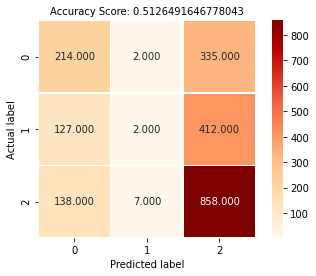

In [47]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred ,acc = train_predict(lr,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test ,acc)

## Decision Tree Classifier

Training a DecisionTreeClassifier using a training set size of 4886 
for training set
accuracy : 0.5071633237822349

for test set
accuracy : 0.4954653937947494


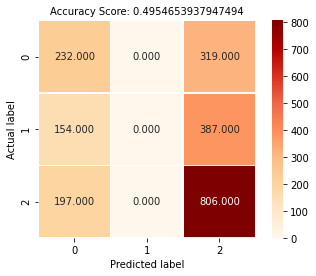

In [48]:
dtree_model = DecisionTreeClassifier(max_depth = 2)
pred ,acc= train_predict(dtree_model,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

## K-Neighbors Classifier

Training a KNeighborsClassifier using a training set size of 4886 
for training set
accuracy : 0.5933278755628326

for test set
accuracy : 0.4510739856801909


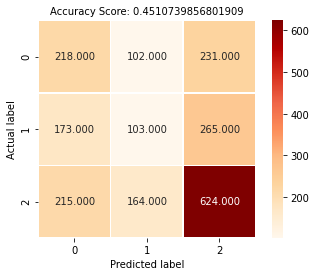

In [49]:
knn = KNeighborsClassifier(n_neighbors = 7)
pred ,acc= train_predict(knn,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

## XGBOOST MODEL

[00:54:13] WARNING: ../src/learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:54:13] WARNING: ../src/learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:54:13] WARNING: ../src/learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

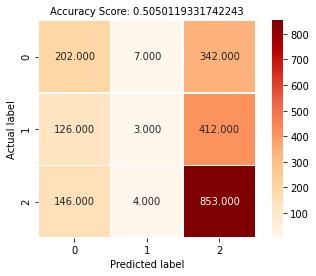

In [50]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,f1_score,accuracy_score


# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

# TODO: Initialize the classifier
clf = xgb.XGBClassifier(seed=82)

# TODO: Make an f1 scoring function using 'make_scorer' 
scorer = make_scorer(accuracy_score)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=scorer,
                        param_grid=parameters,
                        cv=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(x_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
pred ,acc= train_predict(clf,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

## TRYING TO JUST SEE IF HOME TEAM WINS OR NOT

In [70]:
for i,row in modeldata.iterrows():
    if(row.result=='H'):
        df.at[i,'HomeTeamWin']='Y'
    else:
        df.at[i,'HomeTeamWin']='N'
Y=df['HomeTeamWin']


**LOGISTIC REGRESSION

Training a LogisticRegression using a training set size of 4886 
for training set
accuracy : 0.6334424887433483

for test set
accuracy : 0.6133651551312649


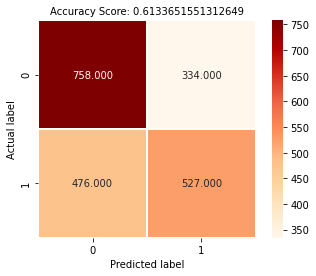

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
lrhome = LogisticRegression()
lrhome.fit(x_train, y_train)
pred ,acc = train_predict(lrhome,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test ,acc)

Training a XGBClassifier using a training set size of 4886 
for training set
accuracy : 0.6412198117069178

for test set
accuracy : 0.5976133651551313


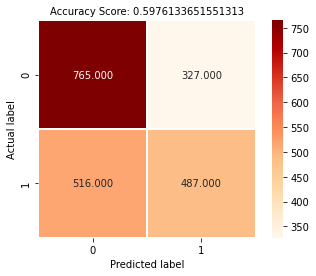

In [72]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,f1_score,accuracy_score


# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  
xgbmodelhome = xgb.XGBClassifier(seed=82)
scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf,
                        scoring=scorer,
                        param_grid=parameters,
                        cv=10)
grid_obj = grid_obj.fit(x_train,y_train)
xgbmodelhome = grid_obj.best_estimator_
pred ,acc= train_predict(xgbmodelhome,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

Training a DecisionTreeClassifier using a training set size of 4886 
for training set
accuracy : 0.6015145313139583

for test set
accuracy : 0.5871121718377088


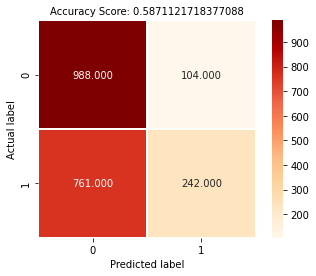

In [73]:
dtree_modelhome = DecisionTreeClassifier(max_depth = 2)
pred ,acc= train_predict(dtree_modelhome,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

## TRYING TO JUST SEE IF AWAY TEAM WINS OR NOT

In [75]:
for i,row in modeldata.iterrows():
    if(row.result=='A'):
        df.at[i,'AwayTeamWin']='Y'
    else:
        df.at[i,'AwayTeamWin']='N'
Y=df['AwayTeamWin']

Training a LogisticRegression using a training set size of 4886 
for training set
accuracy : 0.732705689725747

for test set
accuracy : 0.7479713603818616


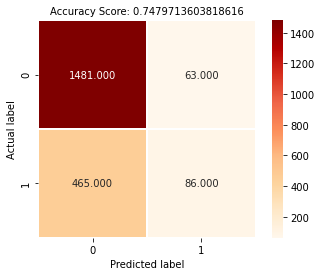

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
lraway = LogisticRegression()
lraway.fit(x_train, y_train)
pred ,acc = train_predict(lraway,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test ,acc)

Training a XGBClassifier using a training set size of 4886 
for training set
accuracy : 0.7410970118706508

for test set
accuracy : 0.7431980906921241


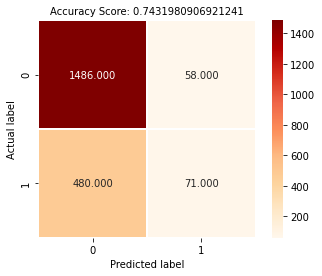

In [77]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,f1_score,accuracy_score


# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  
xgbmodelaway = xgb.XGBClassifier(seed=82)
scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf,
                        scoring=scorer,
                        param_grid=parameters,
                        cv=10)
grid_obj = grid_obj.fit(x_train,y_train)
xgbmodelaway = grid_obj.best_estimator_
pred ,acc= train_predict(xgbmodelaway,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)